# Study Observations:
    1. Tumor responses and metastatic spread in the mice were the more favorable to Capamulin, with an average reduction in mass by 19% over the 45 day trial. This resulted in a higher survival rate for the Capamulin test group.
    2.  The remaining two target drugs Infubinol and Ketapril had similar results and trending to the Placebo.
    3. Although not a target drug in this report, I would like to point out that Ramicane had comparable results to Capamulin.

# Tumor Response to Treatment

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#load Data
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")

#Merged Data Sets
DF = pd.merge(clinical_trial_data, mouse_drug_data, on = "Mouse ID",how="left")

DF.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [58]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint, Convert to DataFrame, Display Results.

drug_interval = DF.groupby(["Drug","Timepoint"], as_index = False).agg({"Tumor Volume (mm3)" : 'mean'})
drug_interval.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [57]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint, Convert to DataFrame, Preview:

se_group = DF.groupby(["Drug","Timepoint"], as_index=False).agg({'Tumor Volume (mm3)':'sem'})
se_group.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [74]:
# Re-Format the Data Frames & Preview
unstacked_mean_volume = DF.groupby(["Drug","Timepoint"]).agg({'Tumor Volume (mm3)':'mean'}).unstack(level=0)
unstacked_mean_volume.head(5)

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

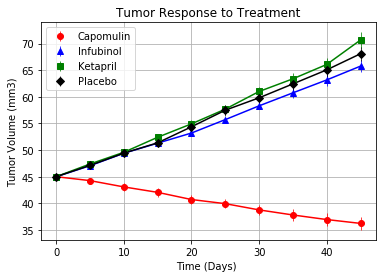

<Figure size 432x288 with 0 Axes>

In [330]:
# Generate the Plot (with Error Bars), Save and Show the Figure
#Remove unneeded Drug data
target_drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
DF2 = DF.loc[DF["Drug"].isin(target_drugs)]
#Group Results with target values
SEM = DF2.groupby(["Drug","Timepoint"], as_index=True).agg({'Tumor Volume (mm3)':'sem'}).unstack(level=0)
SEM.columns = SEM.columns.droplevel(0)

AVG = DF2.groupby(["Drug","Timepoint"], as_index=True).agg({'Tumor Volume (mm3)':'mean'}).unstack(level=0)
AVG.columns = AVG.columns.droplevel(0)

x_axis = DF2["Timepoint"].unique()

error1 = [values for values in SEM.iloc[:,0]]
error2 = [values for values in SEM.iloc[:,1]]
error3 = [values for values in SEM.iloc[:,2]]
error4 = [values for values in SEM.iloc[:,3]]

mean1 = [values for values in AVG.iloc[:,0]]
mean2 = [values for values in AVG.iloc[:,1]]
mean3 = [values for values in AVG.iloc[:,2]]
mean4 = [values for values in AVG.iloc[:,3]]

colors =['r','b','green','black']
marker =  ['o','^','s','D']

plt.errorbar(x_axis, mean1, error1, color=colors[0], marker=marker[0], linewidth=0, elinewidth=0.75, label=target_drugs[0])
plt.plot (x_axis, mean1, color= colors[0])
plt.errorbar(x_axis, mean2, error2, color=colors[1], marker=marker[1], linewidth=0, elinewidth=0.75, label=target_drugs[1])
plt.plot (x_axis, mean2, color= colors[1])
plt.errorbar(x_axis, mean3, error3, color=colors[2], marker=marker[2], linewidth=0, elinewidth=0.75, label=target_drugs[2])
plt.plot (x_axis, mean3, color= colors[2])
plt.errorbar(x_axis, mean4, error4, color=colors[3], marker=marker[3], linewidth=0, elinewidth=0.75, label=target_drugs[3])
plt.plot (x_axis, mean4, color= colors[3])

plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days) ")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")
plt.show()
plt.savefig("data/TumorResults.png")



# Metastatic Response to Treatment

In [322]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint, Convert to DataFrame, Preview
drug_interval2 = DF.groupby(["Drug","Timepoint"], as_index = False).agg({"Metastatic Sites" : 'mean'})
drug_interval2.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [321]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint, Convert, Preview df. 
drug_interval2 = DF.groupby(["Drug","Timepoint"], as_index = False).agg({"Metastatic Sites" : 'sem'})
drug_interval2.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [328]:
# Re-Format the Data Frames & Preview
unstacked_mean_volume2 = DF.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":'mean'}).unstack(level=0)
unstacked_mean_volume2.head(5)

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

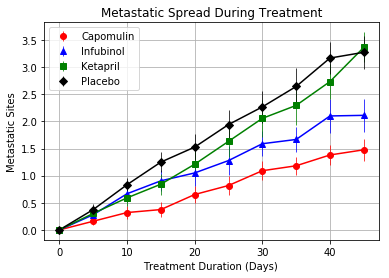

<Figure size 432x288 with 0 Axes>

In [331]:
# Generate the Plot (with Error Bars), Save and Show the Figure


#Group Results with target values
SEM2 = DF2.groupby(["Drug","Timepoint"], as_index=True).agg({"Metastatic Sites":'sem'}).unstack(level=0)
SEM2.columns = SEM2.columns.droplevel(0)

AVG2 = DF2.groupby(["Drug","Timepoint"], as_index=True).agg({"Metastatic Sites":'mean'}).unstack(level=0)
AVG2.columns = AVG2.columns.droplevel(0)

x_axis_m = DF2["Timepoint"].unique()

error1_m = [values for values in SEM2.iloc[:,0]]
error2_m = [values for values in SEM2.iloc[:,1]]
error3_m = [values for values in SEM2.iloc[:,2]]
error4_m = [values for values in SEM2.iloc[:,3]]

mean1_m = [values for values in AVG2.iloc[:,0]]
mean2_m = [values for values in AVG2.iloc[:,1]]
mean3_m = [values for values in AVG2.iloc[:,2]]
mean4_m = [values for values in AVG2.iloc[:,3]]

colors_m =['r','b','green','black']
marker_m =  ['o','^','s','D']

plt.errorbar(x_axis_m, mean1_m, error1_m, color=colors_m[0], marker=marker_m[0], linewidth=0, elinewidth=0.75, label=target_drugs[0])
plt.plot (x_axis_m, mean1_m, color= colors_m[0])
plt.errorbar(x_axis_m, mean2_m, error2_m, color=colors_m[1], marker=marker_m[1], linewidth=0, elinewidth=0.75, label=target_drugs[1])
plt.plot (x_axis_m, mean2_m, color= colors_m[1])
plt.errorbar(x_axis_m, mean3_m, error3_m, color=colors_m[2], marker=marker_m[2], linewidth=0, elinewidth=0.75, label=target_drugs[2])
plt.plot (x_axis_m, mean3_m, color= colors_m[2])
plt.errorbar(x_axis_m, mean4_m, error4_m, color=colors_m[3], marker=marker_m[3], linewidth=0, elinewidth=0.75, label=target_drugs[3])
plt.plot (x_axis_m, mean4_m, color= colors_m[3])

plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days) ")
plt.ylabel("Metastatic Sites")
plt.legend(loc="upper left")
plt.show()
plt.savefig("data/Metastatic_Sites_Results.png")



# Survival Rates

In [332]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric), Convert, and Preview DataFrame
drug_interval3 = DF.groupby(["Drug","Timepoint"], as_index = False).agg({"Mouse ID" : 'count'})
drug_interval3.head(5)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [333]:
# Re-Format the Data Frames & Preview
unstacked_mean_volume3 = DF.groupby(["Drug","Timepoint"]).agg({"Mouse ID" : 'count'}).unstack(level=0)
unstacked_mean_volume3.head(5)

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

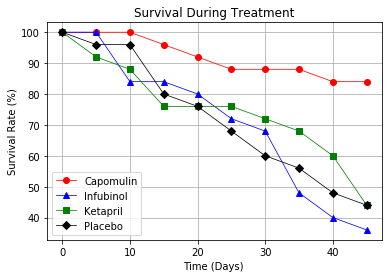

<Figure size 432x288 with 0 Axes>

In [335]:
# Generate the Plot (Accounting for percentages), Save and Show the Figure

CNT = DF2.groupby(["Drug","Timepoint"], as_index=True).agg({"Mouse ID":'count'}).unstack(level=0)
CNT.columns = CNT.columns.droplevel(0)

x_axis_c = DF2["Timepoint"].unique()

max1 = max(CNT.iloc[:,0])
max2 = max(CNT.iloc[:,1])
max3 = max(CNT.iloc[:,2])
max4 = max(CNT.iloc[:,3])

cnt1 = [(values/max1)*100 for values in CNT.iloc[:,0]]
cnt2 = [(values/max2)*100 for values in CNT.iloc[:,1]]
cnt3 = [(values/max3)*100 for values in CNT.iloc[:,2]]
cnt4 = [(values/max4)*100 for values in CNT.iloc[:,3]]

colors_c =['r','b','green','black']
marker_c =  ['o','^','s','D']

plt.plot (x_axis_c, cnt1, color= colors_c[0], marker=marker_c[0], linewidth=0.75, label=target_drugs[0])
plt.plot (x_axis_c, cnt2, color= colors_c[1], marker=marker_c[1], linewidth=0.75, label=target_drugs[1])
plt.plot (x_axis_c, cnt3, color= colors_c[2], marker=marker_c[2], linewidth=0.75, label=target_drugs[2])
plt.plot (x_axis_c, cnt4, color= colors_c[3], marker=marker_c[3], linewidth=0.75, label=target_drugs[3])

plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days) ")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")
plt.show()
plt.savefig("data/Survival_Results.png")


# Summary Bar Graph

In [419]:
# Calculate the percent changes for each drug, Display the data to confirm

begin = DF["Timepoint"].min()
end = DF["Timepoint"].max()

begin_df = DF.loc[DF["Timepoint"] == begin,:]
end_df = DF.loc[DF["Timepoint"] == end,:]
begin_df2 = begin_df.groupby(["Drug"], as_index = False).agg({'Tumor Volume (mm3)' : 'mean'})
end_df2 = end_df.groupby(["Drug"], as_index = False).agg({'Tumor Volume (mm3)' : 'mean'})
Diff = pd.merge(begin_df2, end_df2, on = "Drug", how="inner", suffixes = ('_begin','_end'))
Diff["Percent Change"] = (Diff['Tumor Volume (mm3)_end'] - Diff['Tumor Volume (mm3)_begin'])/ (Diff['Tumor Volume (mm3)_begin'])*100
Diff2 = Diff.groupby(["Drug"], as_index = False).agg({"Percent Change" : 'sum'}).set_index("Drug")
print(Diff2)



           Percent Change
Drug                     
Capomulin      -19.475303
Ceftamin        42.516492
Infubinol       46.123472
Ketapril        57.028795
Naftisol        53.923347
Placebo         51.297960
Propriva        47.241175
Ramicane       -22.320900
Stelasyn        52.085134
Zoniferol       46.579751


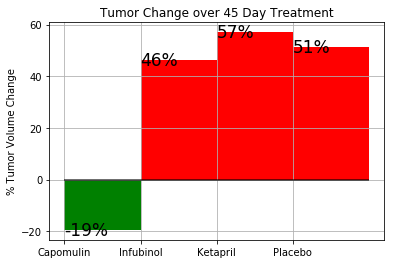

<Figure size 432x288 with 0 Axes>

In [596]:
# Store all Relevant Percent Changes into a Tuple

prep = Diff.loc[Diff["Drug"].isin(target_drugs)]

subset = prep[["Drug", "Percent Change"]]
tuples = [tuple(x) for x in subset.values]

x_values = np.arange(len([x[0] for x in tuples]))
xtick_locations = [value for value in x_values]

y_values =[x[1] for x in tuples]

color = ['r' if i > 0 else 'green' for i in y_values]

plt.bar(x_values,y_values, color=color ,align = 'edge', width=1)
plt.xticks(xtick_locations,target_drugs)
plt.yticks(np.arange(-20, 80, 20))

for a,b in zip(xtick_locations, y_values):
    c= b/100
    plt.text(a, b, "{:.0%}".format(c),fontsize=17, color='black',verticalalignment='center'
            , horizontalalignment='left', wrap=True, clip_on = True)
    
    
# Save and Show the Figure
plt.grid()
plt.hlines(0,0,4, alpha=.75)
#plt.tight_layout()
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.show()
plt.savefig("data/Tumor_Summary.png")
